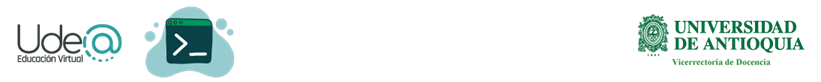

---
# Laboratorio Regresión Lineal
## **Parte A:** Estimación de parámetros

**Laboratorio Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

**Autor: Pablo Alejandro Alvarado Duran**

---
# Introducción a regresión lineal
 La Regresión Lineal (RL) consiste en encontrar una función $f$ que establezca una regla de correspondencia entre los datos de entrada $\textbf{x}_n$ con los datos de salida $y_n$ de manera que

 $$y_n = f(\textbf{x}_n),$$

 donde las entradas $\textbf{x}_n \in \mathbb{R}^D$, y las salidas $y_n \in \mathbb{R}$.

 Regresión es un tema central en inteligencia artificial, reconocimiento de patrones, y aprendizaje de máquina. RL tiene aplicaciones en análisis de series de tiempo, control, robótica, optimización y aprendizaje profundo.

In [1]:
import numpy as np
import scipy as sp
import sklearn as skl
import matplotlib.pyplot as plt

## Cómo se mide el desempeño de un modelo de regresión?
 Que un modelo sea *bueno* o *no* depende de su capacidad de **generalización**, es decir, que prediga de forma precisa los valores de la función $f$ donde hay observaciones $\textbf{x}_n$, así como en partes del espacio entrada donde no hay mediciones o datos.


## Cómo solucionar un problema de regresión lineal?
En general, solucionar un problema de regresión lineal requiere:

1. **Escoger el modelo y su parametrización**

 Qué clase de funciones se van usar o cuáles son buenas candidatas (ej. funciones polinomiales), además de sus parámetros (ej. grado orden del polinomio).


2. **Encontrar los parámetros adecuados (inferencia)**

 Cómo encontramos los parámetros adecuados para que el modelo se ajuste bien a los datos? Las **funciones objetivo** determinan o miden que tan bien se ajusta un modelo a los datos. Por otro lado, los **algoritmos de optimización** nos permiten encontrar los valores de los parámetros que minimizan la función objetivo, esto se conoce como **inferencia**.
 

3. **Evaluar el desempeño del modelo**

 El sobreentrenamiento (overfitting) ocurre cuando el modelo se ajusta muy bien a los datos de entrenamiento (observaciones) pero no a los datos de test (no observados). Esto ocurre, por lo general, cuando el modelo es demasiado flexible o complejo.

En la **parte A** de este laboratorio nos enfocaremos en la definición de modelos de regresión, como inferir sus parámetros, y cómo medir la calidad de las predicciones. Luego, en la **parte B** (proximo laboratorio) vamos a analizar las causas del sobreentrenamiento y cómo mitigarlo con regularización y regresión Bayesiana.

---
# Selección del modelo y parametrización
Cómo punto de partida consideraremos el modelo de regresión lineal de la forma

$$
\begin{align}
y &= \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_D x_D, \\
y &= \sum_{i=0}^{D}\theta_{i}x_i, \\
y &= \textbf{x}^\top\boldsymbol\theta, \\
y &= f(\textbf{x},\boldsymbol\theta).
\end{align}
$$

Si además adicionamos ruido o incertidumbre en las mediciones, obtenemos

$$
y = \textbf x^\top\boldsymbol\theta + \epsilon\,,\quad \epsilon \sim \mathcal N\left(0, \sigma^2\right)
$$

donde $\textbf x \in \mathbb R^D$ son las entradas, mientras que $ y \in \mathbb R$ son las observaciones ruidosas de salida. Además, el vector de parámetros $\boldsymbol \theta \in \mathbb R ^D$ define la forma específica de la función $f$.

Se asume que tenemos un conjunto de datos de entrenamiento $(\textbf x_n, y_n)$ para $n=1,\ldots, N$, de manera que agrupamos los conjuntos de datos de entrada y de salida como $\mathcal X = \{\textbf x_1, \ldots, \textbf x_N\}$, $\mathcal Y = \{y_1, \ldots, y_N\}$. Nuestro objetivo es encontrar valores apropiados para los parámetros $\boldsymbol\theta$ dado los datos $\{ \mathcal X, \mathcal Y \}$.

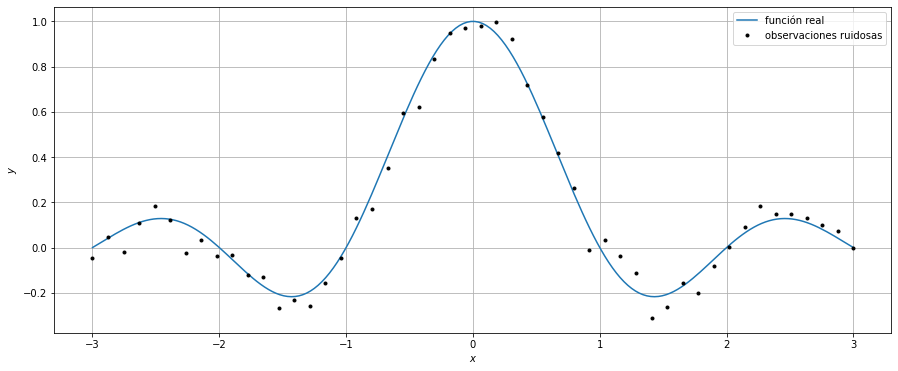

In [2]:
# generar base de datos sintética
X = np.linspace(-3, 3, 50).reshape(-1, 1)
y = np.sinc(X) + 0.05*np.random.normal(size=(X.shape))

xfun = np.linspace(-3, 3, 200).reshape(-1, 1)
yfun = np.sinc(xfun)

plt.figure(figsize=(15,6))
plt.plot(xfun, yfun)
plt.plot(X, y, '.k')
plt.xlabel("$x$")
plt.ylabel("$y$");
plt.grid()
plt.legend(['función real', 'observaciones ruidosas'])
plt.show()

## Qué significa *lineal* en regresión lineal?
 En este contexto, la palabra *lineal* hace referencia a que el modelo (función a ajustar) es lineal con respecto a los parámetros $\boldsymbol{\theta}$, es decir, la función modelo está definida como una combinación lineal de las variables de entrada.

## Funciones base
Los modelos de regresión lineal no sólo nos permiten ajustar líneas rectas, también nos permiten modelar funciones no lineales con respecto a las entradas $\textbf{x}$. Esto se logra a través de *funciones base*:

$$
\begin{align}
y &= f(\textbf{x}, \boldsymbol\theta) + \epsilon, \\
y &= \sum_{k = 0}^K \theta_k \phi_k(\textbf{x}) + \epsilon,
\end{align}
$$

donde las funciones base $\phi_k(\textbf{x})$ son transformaciones (posiblemente no lineales) de las variables de entrada $\textbf{x}$.

### Funciones polinomiales
Si asumimos la dimensión del espacio de entrada $D=1$, es decir $\textbf x = x$, y además utilizamos funciones base polinomiales $\phi_k(x) = x^k$, el modelo de regresión lineal estaría definido como

$$
\begin{align}
f(x, \boldsymbol \theta) &= \sum_{k=0}^K \theta_k x^k, \\
%
&= \boldsymbol \phi(x)^\top\boldsymbol\theta,
\end{align}
$$

donde

$$
 \boldsymbol\phi(x)
 =
 \begin{bmatrix}
 \phi_0(x)\\
 \phi_1(x)\\
 \vdots\\
 \phi_K(x)
 \end{bmatrix}
 =
 \begin{bmatrix}
 x^0\\
 x^1\\
 \vdots\\
 x^K
 \end{bmatrix}
 \in \mathbb R^{K+1}.
$$

Es decir, $\boldsymbol\phi(x)$ es un vector que contiene todas transformaciones no lineales aplicadas sobre la entrada $x$. Agrupando para todos los datos $N$ se obtiene la matriz

$$
\boldsymbol\Phi =
\begin{bmatrix}
\boldsymbol\phi(x_1)^\top & \boldsymbol\phi(x_2)^\top & \cdots & \boldsymbol\phi(x_N)^\top
\end{bmatrix}
\in \mathbb R^{N \times (K+1)}.
$$

Por lo tanto,

$$
\textbf{y} = \boldsymbol \Phi \boldsymbol \theta
$$

In [3]:
def poli_carac(X, K):
    # Transformación polinomial
    # X: N x D, vector de entradas
    # K: escalar, grado del polinomio
    # return: N x (K+1), matriz de características Phi

    X = X.flatten()
    N = X.shape[0]

    #inicializar Phi
    Phi = np.zeros((N, K+1))

    # Calcular matriz Phi
    for k in range(K+1):
        Phi[:,k] = X**k
    return Phi

In [4]:
def plot_caracteristicas(X, Phi, K):
    plt.figure(figsize=(15,6))
    legend = []
    for i in range(K+1):
        plt.plot(X, Phi[:, i])
        legend.append(r'$\phi_' + str(i) +'$(x)'  )
        plt.legend(legend);
        plt.ylim([-1.5, 1.5])
        plt.grid(True)


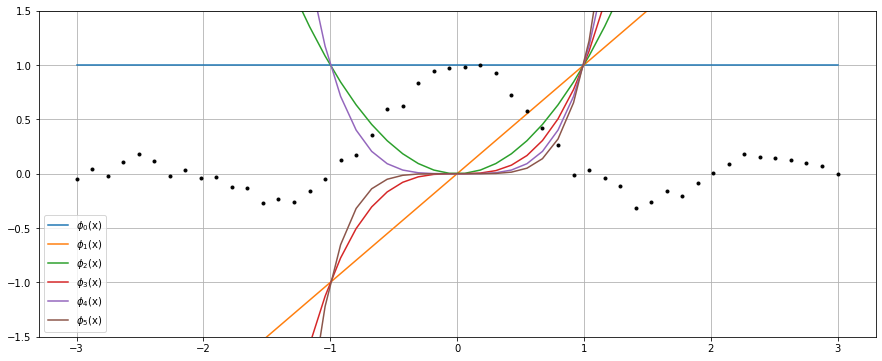

Phi.shape:  (50, 6)


In [5]:
K = 5
Phi = poli_carac(X, K)
plot_caracteristicas(X, Phi, K)
plt.plot(X, y, '.k')
plt.show()
print("Phi.shape: ", Phi.shape)

### Funciones exponenciales cuadráticas
En este caso, las funciones base $\phi_k(x)$ para $k = 1, 2, \cdots, K$ tienen la forma

$$
\phi_k(x) = \exp \left[- \frac{(\mu_k - x)^2}{\sigma^2} \right]
$$

In [6]:
def expo_carac(X, K):
    # Transformación exponencial
    # X: N x D, vector de entradas
    # K: escalar, grado del polinomio
    # return: N x (K+1), matriz de características Phi

    X = X.flatten()
    N = X.shape[0]

    #inicializar Phi
    Phi = np.ones((N, K+1))
    mu = np.linspace(-3,3,K)
    sig2 = 0.1

    # Calcular matriz Phi
    for k in range(1, K+1):
        Phi[:,k] = np.exp(-(mu[k-1] - X)**2/sig2)
    return Phi

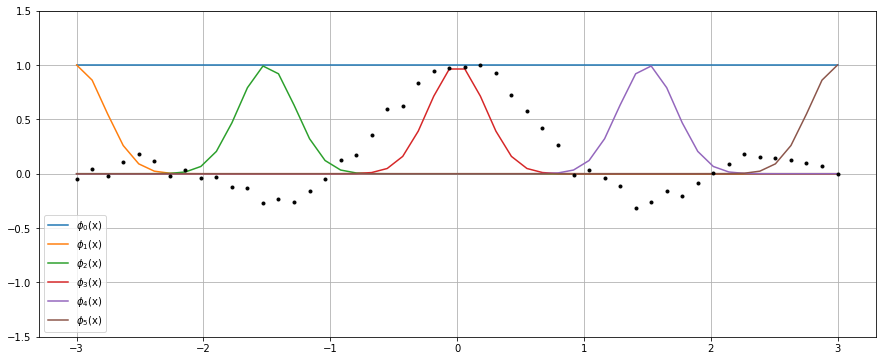

Phi.shape:  (50, 6)


In [7]:
K = 5
Phi = expo_carac(X, K)
plot_caracteristicas(X, Phi, K)
plt.plot(X, y, '.k')
plt.show()
print("Phi.shape: ", Phi.shape)

### Funciones base sinusoidales

En este caso, las funciones base $\phi_k(x)$ para $k = 1, 2, \cdots, K$ tienen la forma

$$
\phi_k(x) = \cos \left( \frac{2 \pi}{T_k}x \right),
$$

donde $T_k$ es el periodo de la función base.


In [8]:
def cos_carac(X, K):
    # Transformación sinusoidal
    # X: N x D, vector de entradas
    # K: escalar, grado del polinomio
    # return: N x (K+1), matriz de características Phi

    X = X.flatten()
    N = X.shape[0]

    #inicializar Phi
    Phi = np.ones((N, K+1))
    F0= 1/6.0
    F = F0 * np.linspace(1, K, K)
    #print(1./F)

    # Calcular matriz Phi
    for k in range(1, K+1):
        Phi[:,k] = np.cos(2*np.pi*F[k-1]*X)
    return Phi

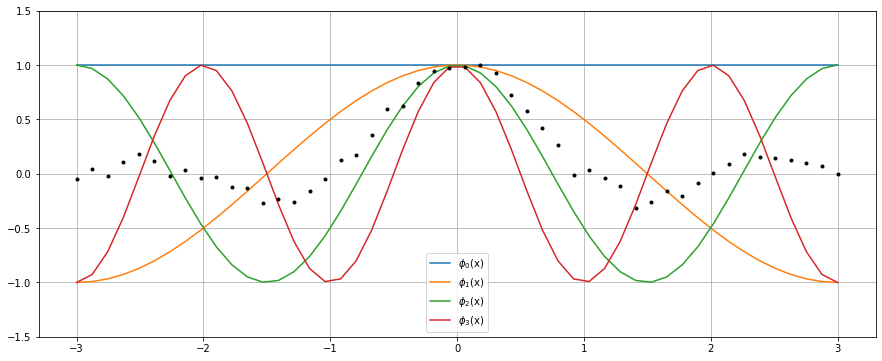

Phi.shape:  (50, 4)


In [9]:
K = 3
Phi = cos_carac(X, K)
plot_caracteristicas(X, Phi, K)
plt.plot(X, y, '.k')
plt.show()
print("Phi.shape: ", Phi.shape)

Ahora, recordemos como se hace la predicción vectorial y veamos como se comporta esto para unos pesos aleatorios de **$\boldsymbol \theta$** y tres tipos de funciones base (polinomial, exponencial, coseno).

$$
\textbf{y} = \boldsymbol \Phi \boldsymbol \theta,
$$

In [1]:
K = 5
Phi_poli = poli_carac(X, K)
Phi_expo = expo_carac(X, K)
Phi_cos = cos_carac(X, K)

plt.figure(figsize=(15,6))

for i in range(3):
    theta_random = np.random.normal(size=(K+1,1))
    #print(theta_random)

    y_poli = Phi_poli @ theta_random
    y_expo = Phi_expo @ theta_random
    y_cos = Phi_cos @ theta_random

    plt.subplot(1,3,1)
    plt.plot(X, y_poli)
    plt.plot(X, y, '.k')

    plt.subplot(1,3,2)
    plt.plot(X, y_expo)
    plt.plot(X, y, '.k')

    plt.subplot(1,3,3)
    plt.plot(X, y_cos)
    plt.plot(X, y, '.k')

NameError: name 'poli_carac' is not defined

Como se puede observar en las gráficas, **NO** logramos representar correctamente los datos, esto dado a que los parámetros ($\boldsymbol \theta$) fueron estimados de manera aleatoria. A continuación conoceremos cual es la manera adecuada de hacerlo

---
# Inferencia
Por **inferencia** nos referimos a encontrar los parámetros $\boldsymbol \theta$ óptimos según alguna medida establecida conocida como **función objetivo**.

A continuación, presentamos dos formas de dividir un dataset en datos de *entrenamiento* y *test*. Es una práctica común utilizar el 70% de las observaciónes para entrenamiento (training), y el restante 30% para test. Esto nos permite evaluar el desempeño sobre datos que el modelo no conoce de antemano.

## Selección datos de entrenamiento

### Forma secuencial (extrapolar)

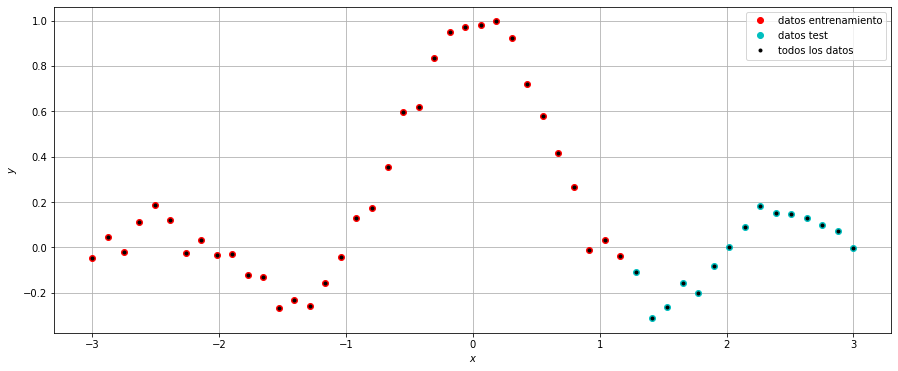

In [11]:
Xtrain = X[0:35] # 70% entrenamiento
ytrain = y[0:35]

Xtest = X[35:] # 30% test
ytest = y[35:]

plt.figure(figsize=(15,6))
plt.plot(Xtrain, ytrain, 'or')
plt.plot(Xtest, ytest, 'oc')
plt.plot(X, y, '.k')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(['datos entrenamiento', 'datos test', 'todos los datos'])
plt.grid()
plt.show()

### Forma aleatoria (interpolación)





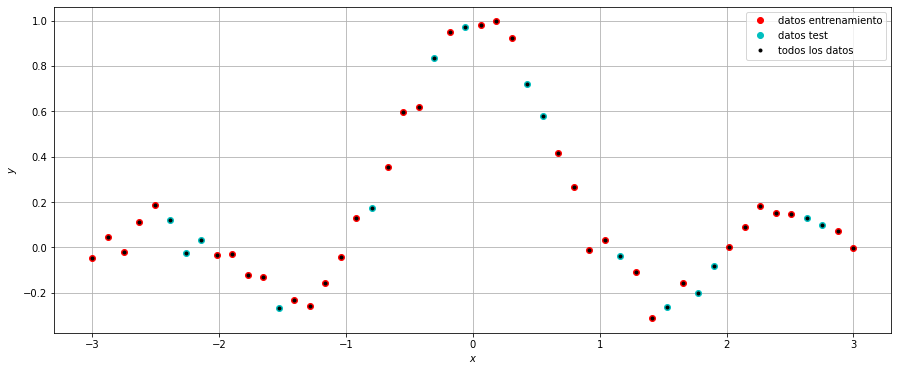

In [12]:
Xs, ys = skl.utils.shuffle(X, y)
Xtrain = Xs[0:35] # 70% entrenamiento
ytrain = ys[0:35]

Xtest = Xs[35:] # 30% test
ytest = ys[35:]

plt.figure(figsize=(15,6))
plt.plot(Xtrain, ytrain, 'or')
plt.plot(Xtest, ytest, 'oc')
plt.plot(X, y, '.k')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(['datos entrenamiento', 'datos test', 'todos los datos'])
plt.grid()
plt.show()


## Máxima verosimilitud
El enfoque de máxima verosimilitud consiste en encontrar los parámetros óptimos a través de la maximización de la verosimilitud de los datos observados. Intuitivamente, maximizar la verosimilitud significa maximizar la distribución predictiva de los datos de entrenamiento dados los parámetros del modelo. La **función objetivo** a maximizar corresponde a:

$$
p(\mathcal Y | \mathcal X, \boldsymbol\theta) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol\theta),
$$

En la práctica se minimiza el negativo del logaritmo de la verosimilitud

$$
-\log p(\mathcal Y | \mathcal X, \boldsymbol\theta) = -\sum_{n=1}^N \log p(y_n | \boldsymbol x_n, \boldsymbol\theta).
$$

La log-transformación es útil ya que: (i) no sufre de desbordamiento numérico, y (ii) las reglas de diferenciación resultarán más simples. Más concretamente, el desbordamiento numérico será un problema cuando multipliquemos N probabilidades, donde N es el número de puntos de datos, ya que no podemos representar números muy pequeños, como $10^{-256}$. Además, la log-transformación convertirá el producto en una suma de log-probabilidades de forma que el gradiente correspondiente es una suma de gradientes individuales, en lugar de una aplicación repetitiva de la regla del producto para calcular el gradiente de un producto de N términos.

El óptimo de esta función con respecto a los parámetros $\boldsymbol{\theta}$ se puede encontrar de forma cerrada y corresponde a la expresión

$$
\boldsymbol\theta^{\text{ML}} = (\textbf{ X}^\top \textbf{X})^{-1}\textbf{X}^\top\textbf{ y},
$$

donde $\boldsymbol\theta^{\text{ML}} \in\mathbb{R}^D$,

$$
\textbf{X} = [\boldsymbol x_1, \ldots, \boldsymbol x_N]^\top \in \mathbb{R}^{N\times D},
$$

$$
\textbf{y} = [y_1, \ldots, y_N]^\top \in\mathbb{R}^N\,.
$$


[**Explicación Máxima Verosimilitud**](https://www.youtube.com/watch?v=XepXtl9YKwc&t=205s)

In [2]:
def plot_prediccion(X, prediccion):
    # Gráfica predicción
    
    #plt.figure(figsize=(15,6))
    plt.plot(Xtrain, ytrain, '.k')
    plt.plot(X, np.sinc(X), lw=2)
    plt.plot(X, prediccion, '--', lw=2)
    # plt.xlabel("$x$")
    # plt.ylabel("$y$")
    plt.legend(['datos entrenamiento', 'función real', 'predicción'])
    plt.ylim([-0.3, 1.1])

In [3]:
def inferencia_max_vero(X, y):
  # cálculo de la máxima verosimilitud
  # X: N x D, matriz de datos de entrada
  # y: N x 1, vector de observaciones salidas
  # return: D x 1, vector de parámetros estimados

  return np.linalg.solve(X.T @ X, X.T @ y)


### Inferencia usando funciones base

Si utilizamos funciones base los parámetros óptimos se calculan con la siguiente expresión

$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^\top\boldsymbol\Phi)^{-1}\boldsymbol\Phi^\top \textbf{y}
$$

> Por motivos de estabilidad, es una práctica común adicionar un valor pequeño llamado "jitter" $\kappa>0$ en la diagonal de $\boldsymbol\Phi^\top\boldsymbol\Phi$, de manera que podamos invertir esta matriz sin problemas. Los parámetros óptimos se calculan de forma más estable con la expresión

$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^\top\boldsymbol\Phi + \kappa\textbf{I})^{-1}\boldsymbol\Phi^\top \textbf{y}
$$

In [15]:
def inferencia_max_vero_carac(Phi, y):
    # máxima verosimilitud usando funciones base
    # Phi: N x D, caracteristicas
    # y: N x 1, datos de salida observados
    # return: D x 1, vector de parametros estimados

    kappa = 1e-09 # jitter
    D = Phi.shape[1]

    Pt = Phi.T @ y # Phi^T*y
    PP = Phi.T @ Phi + kappa*np.eye(D) # Phi^T*Phi + kappa*I
    C = sp.linalg.cho_factor(PP)
    theta_ml = sp.linalg.cho_solve(C, Pt) # inv(Phi^T*Phi)*Phi^T*y
    return theta_ml

---
# Predicción
Para hacer predicciones en los puntos de test $\textbf{X}_{\text{test}}$ es necesario aplicar primero las transformaciones sobre los datos de entrada $\boldsymbol\Phi_{\text{test}}= \boldsymbol\phi(\textbf{X}_{\text{test}})$, y posteriormente calcular la media predictiva $\textbf{y}^{\text{pred}}$ como

$$
\textbf{y}^{\text{pred}} = \boldsymbol \Phi_{\text{test}}\boldsymbol\theta^{\text{ML}}
$$

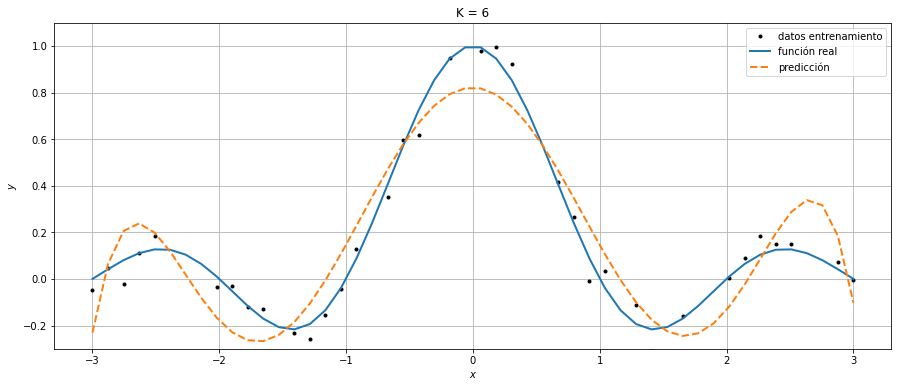

In [16]:
# selección y parametrización
K = 6 # grado del polinomio
Phi = poli_carac(Xtrain, K) # características datos entrenamiento

# inferencia usando max vero
theta_ml = inferencia_max_vero_carac(Phi, ytrain)


# predicción sobre todos los datos
Phi_test = poli_carac(X, K) # características todos los datos
y_pred = Phi_test @ theta_ml # predicción

# graficar resultados
plt.figure(figsize=(15,6))
plot_prediccion(X, y_pred)
plt.title('K = ' + str(K));
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.show()

---
# Validación
En la etapa final de aprendizaje de máquina se evalua la calidad de las predicciónes del modelo.

## Evaluación visual (cualitativa)

Inicialmente podemos graficar las predicciones y compararlas con los datos de entrenamiento y test, evaluando visualmente que tan acertado es el modelo entrenado. Además, es muy necesario evaluar cuantitativamente el modelo obtenido. Para esto debe definirse una medida de error entre las predicciones y las observaciones.

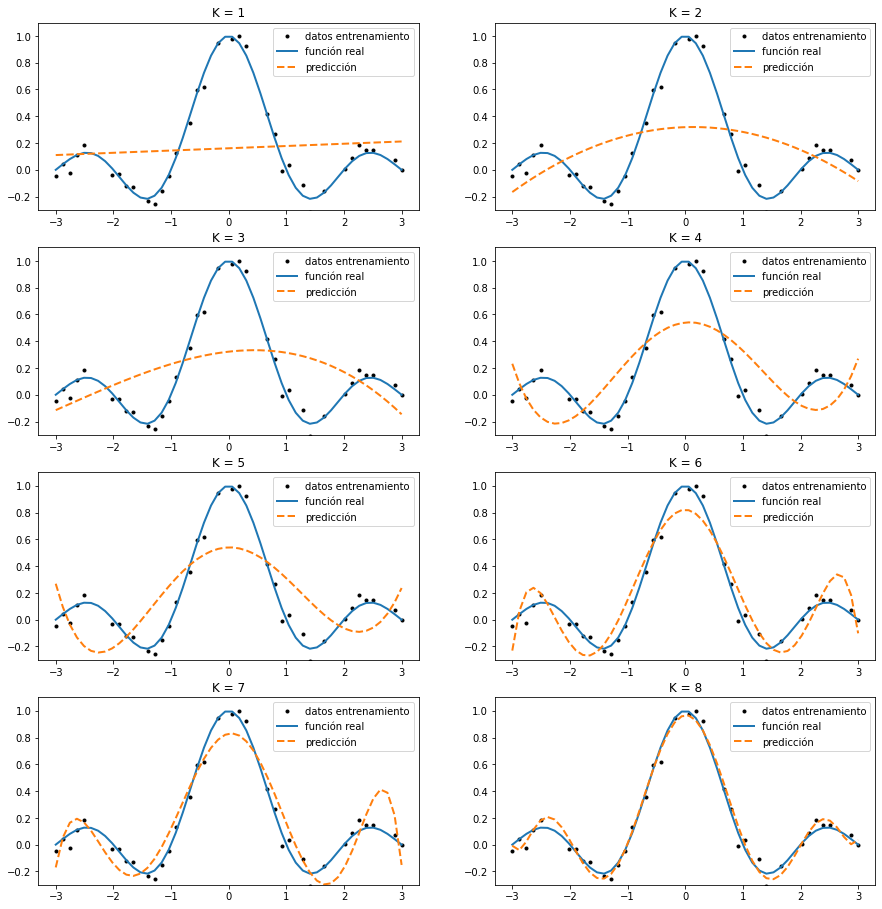

In [17]:
plt.figure(figsize=(15,20))
carac = poli_carac

for i in range(1, 9):
    # selección y parametrización
    K = i # grado del polinomio
    Phi = carac(Xtrain, K) # características datos entrenamiento

    # inferencia usando max vero
    theta_ml = inferencia_max_vero_carac(Phi, ytrain)

    # predicción sobre todos los datos (Test)
    Phi_test = carac(X, K) # características todos los datos
    y_pred = Phi_test @ theta_ml # predicción

    # graficar resultados
    plt.subplot(5,2,i)
    plot_prediccion(X, y_pred)
    plt.title('K = ' + str(K))

## Evaluación usando RMSE (cuantitativa)
A continuación, vamos a utilizar el RMSE (root mean squared error) como medida de error. Podemos calcular la calidad de las predicciones del modelo utilizando la raíz cuadrada del error cuadrático medio entre los valores predecidos por el modelo $ y_n^\text{pred}$, y los valores reales de la base de datos $y_n$, de manera que

$$
 \text{RMSE} = \sqrt{\frac{1}{N}\sum_{n=1}^N \left( y_n - y_n^\text{pred} \right)^2}
$$


In [18]:
def rmse(y, y_pred):
    # Calculo función de error
    y = y.flatten()
    y_pred = y_pred.flatten()
    N = y.shape[0]
    difer = (y - y_pred)**2
    return np.sqrt((1.0/N) * np.sum(difer))

A continuación haremos una evaluación cuantitativa de las predicciones obtenidas con diferentes modelos, cada uno definido con una cantidad diferente de funciones base $K$.

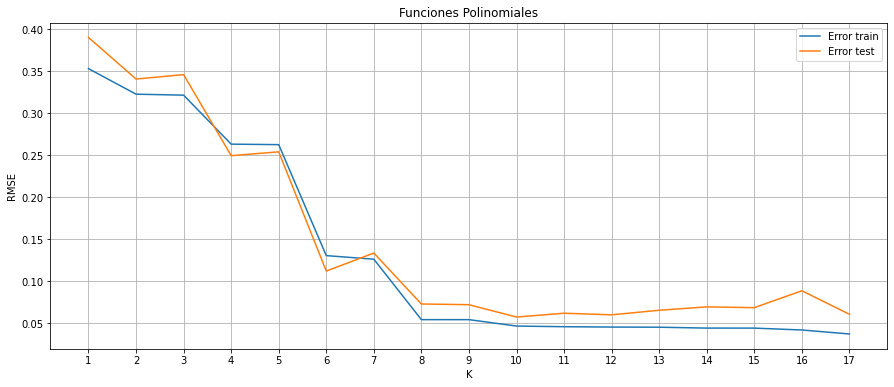

In [19]:
rmse_train = []
rmse_test = []
carac = poli_carac # seleccionar tipo de funciones base (poli, expo, cos)
K_max = 18 # cantidad máxima de caracteristicas

for i in range(1, K_max):
    # selección y parametrización
    K = i # grado del polinomio
    Phi = carac(Xtrain, K)

    # inferencia usando max vero
    theta_ml = inferencia_max_vero_carac(Phi, ytrain)

    # predicción sobre datos de entrenamiento
    Phi_test = carac(Xtrain, K)
    y_pred = Phi_test @ theta_ml # predicción
    rmse_train.append(rmse(ytrain, y_pred)) # medir error

    # predicción sobre datos de test
    Phi_test = carac(Xtest, K)
    y_pred = Phi_test @ theta_ml # predicción
    rmse_test.append(rmse(ytest, y_pred)) # medir error

# graficar errores
k_vector = np.linspace(1,K,K)

plt.figure(figsize=(15,6))
plt.plot(k_vector, rmse_train, '-', label='Error train')
plt.plot(k_vector, rmse_test, '-', label='Error test')
plt.xticks(k_vector);
plt.ylabel('RMSE')
plt.xlabel('K')
plt.title('Funciones Polinomiales')
plt.legend()
plt.grid()

---
# Trabajo de laboratorio

Como trabajo de laboratorio vamos a entrenar un modelo de regresión para el caso **univariado** $y_n = f(x_n) + \epsilon$, donde la salida $ y_n∈ \mathbb{R}$, y la entrada $ x_n ∈ \mathbb{R}$. El procedimiento es el siguiente:

 1. Descargar una base de datos para regresión y visualizarla (por ejemplo buscar en https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets).


 2. Dividir la base de datos en 70% para entrenamiento y 30% para test, utilizando primero una partición aleatoria, y luego una partición secuencial. Graficar ambos tipos de particiones.


 3. Seleccione dos funciones base ya implementadas (polinomial, exponencial, o coseno), y además implemente un nuevo tipo de función base que usted eliga, de manera que pueda definir tres modelos diferentes de regresión lineal.


 4. A continuación, establezca la cantidad de funciones base $K$ necesarias para que el modelo se sobreentrene. Seguir el siguiente procedimiento para $K = 1, 2, \cdots, K_{\text{max}}$.


 5. Inferir los parámetros para cada modelo utilizando máxima verosimilitud.


 6. Grafique las predicciones de los modelos entrenados, junto con los datos de entrenamiento y test. Describa e interprete los resultados.


 7. Calcule el RMSE entre las predicciones de cada modelo `y_pred` y los datos de test `y_test`, así como el RMSE entre las predicciones de cada modelo `y_pred` y los datos de entrenamiento `y_train`. Grafique los errores (eje y) vs el número de funciones base (eje x). ¿Qué modelo presenta mejor capacidad de generalización? argumente.

---
# Bibliografía

- Pattern Recognition and Machine Learning, Christopher M. Bishop. https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf (libro original gratis).

- Mathematics for Machine Learning, Marc Peter Deisenroth. https://mml-book.github.io/ (libro original gratis).

- Cuadernos del libro: Mathematics for Machine Learning. https://nbviewer.org/github/mml-book/mml-book.github.io/blob/master/tutorials/tutorial_linear_regression.ipynb